In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV,learning_curve


In [59]:
X_train = pd.read_csv('csv/X_train.csv')
X_test = pd.read_csv('csv/X_test.csv')
y_train = pd.read_csv('csv/y_train.csv')
y_test = pd.read_csv('csv/y_test.csv') 

In [60]:

modelRid = make_pipeline( PolynomialFeatures(degree=2,interaction_only=False),GridSearchCV(Ridge(),param_grid={'alpha': [0,0.01,0.05,0.1,1,10,100,300,400,500,1000,10000]},
                                 scoring='r2',
                                 refit=True))

for exp in range(2):
    affinage = modelRid.fit(X_train,y_train)[1].best_params_["alpha"]
    liste_param = [param for param in np.arange(affinage - (affinage/10**(exp+1)),affinage + (affinage/10**(exp+1)), 10**(-exp))]
    modelRid = make_pipeline( PolynomialFeatures(degree=2,interaction_only=False),GridSearchCV(Ridge(),param_grid={'alpha': liste_param},
                                 scoring='r2',
                                 refit=True))

best_alpha = modelRid.fit(X_train,y_train)[1].best_params_["alpha"]



In [61]:
modelRid = make_pipeline( PolynomialFeatures(degree=2),Ridge(alpha=best_alpha))

/tmp/ipykernel_21193/2990030228.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(modelRid,X_train.append(X_test),y_train.append(y_test), cv=30,return_times=True)


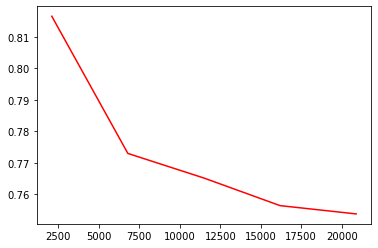

In [62]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(modelRid,X_train.append(X_test),y_train.append(y_test), cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1),'r')

plt.show()


In [63]:
modelRid.fit(X_train,y_train)
modelRid.score(X_train,y_train)

0.7556753442522938

In [64]:
modelRid.score(X_test,y_test)

0.7337239242647486

In [65]:
y_prediction = modelRid.predict(X_test)
df_prediction = pd.DataFrame(y_prediction,columns=["prediction"])

In [66]:
df_prediction["resultat"] = y_test['price']

In [67]:
df_prediction["diff"]= ((df_prediction["resultat"] - df_prediction["prediction"])**2)**(1/2)

In [68]:
df_prediction.describe()

,prediction,resultat,diff
count,4.323000e+03,4.323000e+03,4.323000e+03
mean,5.355414e+05,5.292426e+05,1.244814e+05
std,2.982884e+05,3.448939e+05,1.271802e+05
min,5.983252e+04,8.900000e+04,4.622462e+01
25%,3.559508e+05,3.170000e+05,4.856192e+04
50%,4.428936e+05,4.400000e+05,9.616424e+04
75%,5.999282e+05,6.317500e+05,1.579152e+05
max,3.846421e+06,5.570000e+06,1.723579e+06


In [69]:
df_prediction

,prediction,resultat,diff
0,3.996391e+05,297000.0,102639.069938
1,1.539073e+06,1578000.0,38926.574852
2,3.682020e+05,562100.0,193897.994402
3,4.063944e+05,631500.0,225105.561591
4,7.608100e+05,780000.0,19190.039297
...,...,...,...
4318,7.978389e+05,844000.0,46161.123521
4319,3.231654e+05,335500.0,12334.568113
4320,3.269587e+05,369950.0,42991.254330
4321,2.901104e+05,300000.0,9889.612644


In [70]:
# modelLasso = make_pipeline( PolynomialFeatures(2),GridSearchCV(Lasso(),param_grid={'alpha': [0.0001,0.001,0.01,0.05,0.1,0.5,1],"tol":[0.0001,0.001,0.01,0.05,0.1,0.5,1]},
#                                                                 cv=2,refit=True))
# modelLasso.fit(X_train,y_train)

In [71]:
# modelLasso.score(X_test,y_test)

In [72]:
# prediction = modelLasso.predict(X_test)
# prediction

In [73]:
# modelEN = make_pipeline( PolynomialFeatures(2),GridSearchCV(ElasticNet(),param_grid={'alpha': [0.0001,0.001,0.01,0.05,0.1,0.5,1],"tol":[0.0001,0.001,0.01,0.05,0.1,0.5,1]},
#                                                                 cv=2,refit=True))
# modelEN.fit(X_train,y_train)
# print("")

In [74]:
# modelEN.score(X_test,y_test)

In [75]:
# prediction = modelEN.predict(X_test)
# prediction

In [76]:
modelLR = make_pipeline( PolynomialFeatures(2),LinearRegression())
modelLR.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [77]:
modelLR.score(X_test,y_test)

0.7247999910334847

In [78]:
y_lr_prediction = modelLR.predict(X_test)
y_lr_prediction

array([[ 418194.59973145],
       [1554358.01794434],
       [ 395849.19812012],
       ...,
       [ 302784.56091309],
       [ 254100.40026855],
       [ 369337.27624512]])

In [79]:
modelDummy = DummyRegressor()
modelDummy.fit(X_train,y_train)
modelDummy.score(X_test,y_test)

-0.0015455076015480351

In [80]:
prediction = modelDummy.predict(X_test)
prediction

array([542799.8377675, 542799.8377675, 542799.8377675, ...,
       542799.8377675, 542799.8377675, 542799.8377675])